In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

%matplotlib inline

#### Generate Accumulated Cost Matrix
$$a = \frac{1}{2}$$

In [3]:
def accumulated_cost_matrix(x, y, distances, constraints=None, radius=1):
    accumulated_cost = np.zeros((len(y), len(x)))
    accumulated_cost[0,0] = distances[0,0]
    
    for i in range(1, len(x)):
        accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]   
    
    for i in range(1, len(y)):
        accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]  
    
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
            if constraints:
                accumulated_cost[i, j] = constraints(x, y, i, j, accumulated_cost, radius)
    
    return accumulated_cost

In [4]:
def distance_cost_matrix(x, y, distance=euclidean):
    distance_cost = np.zeros((len(y), len(x)))
    
    for i in range(len(y)):
        for j in range(len(x)):
            distance_cost[i,j] = (x[j]-y[i])**2
        
    return distance_cost

In [5]:
def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return path, cost

In [6]:
def plot_distance_cost_matrix(cost_matrix, path):
    path_x = [point[0] for point in path]
    path_y = [point[1] for point in path]
    
    plt.figure()
    plt.plot(path_x, path_y)
    plt.axis("off")
    im = plt.imshow(cost_matrix, interpolation='nearest', cmap='Oranges')
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

In [7]:
def plot_data_mapping(x, y, mapping):
    plt.figure()
    plt.plot(x, 'bo-' ,label='x')
    plt.plot(y, 'g^-', label = 'y')
    plt.legend();
    for [map_x, map_y] in mapping:
        plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')

### Constraints

In [14]:
def sakoe_chuba_band_constraint(x, y, i, j, matrix, radius):
    index_distance = (i+j)/2
    distance = euclidean([index_distance, index_distance], [i, j])
    if distance > radius:
        return math.inf
    return matrix[i, j]

def itakura_parallelogram_constraint(x, y, i, j, matrix, radius):
    center = [len(y) // 2, len(x) // 2]
    index_midpoint = (i+j)/2
    max_distance_from_center = euclidean(center, [0, 0])
    midpoint_distance_from_center = euclidean(center, [index_midpoint, index_midpoint])
    
    distance = euclidean([index_midpoint, index_midpoint], [i, j])
    radius = (1 - (midpoint_distance_from_center / max_distance_from_center)) * radius
    
    if distance > radius:
        return math.inf
    return matrix[i, j]

In [15]:
def dtw(x, y, distance=euclidean, constraints=None, radius=3):
    distance_cost = distance_cost_matrix(x, y)
    accumulated_cost = accumulated_cost_matrix(x, y, distance_cost, constraints, radius)
    paths, cost = path_cost(x, y, accumulated_cost, distance_cost)
              
    return paths, cost, distance_cost, accumulated_cost

In [16]:
x = np.array([1, 1, 2, 3, 2, 0])
y = np.array([0, 1, 1, 2, 3, 2, 1])

COST: 6.654822235133799


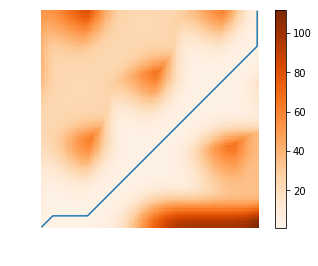

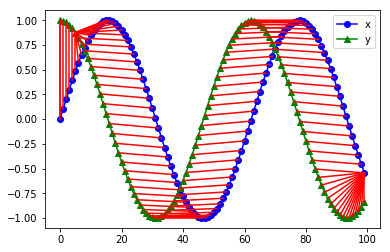

In [22]:
idx = np.linspace(0, 10, 100)
x = np.sin(idx)
y = np.cos(idx)

paths, cost, distance_cost, accumulated_cost = dtw(x, y, constraints=None, radius=30)
print("COST:", cost)
plot_distance_cost_matrix(accumulated_cost, paths)
plot_data_mapping(x, y, paths)